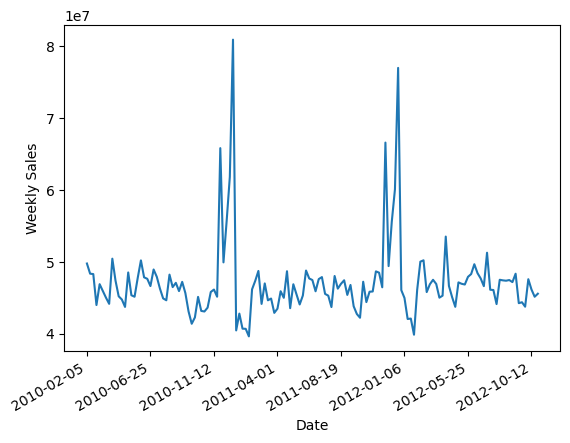

,Store,Dept,Weekly_Sales,IsHoliday
Date,,,,
2010-02-05,65124,130557,49750740.50,0.0
2010-02-12,65082,131179,48336677.63,1.0
2010-02-19,65610,131897,48276993.78,0.0
2010-02-26,65045,130161,43968571.13,0.0
2010-03-05,64897,129670,46871470.30,0.0
...,...,...,...,...
2012-09-28,65866,130785,43734899.40,0.0
2012-10-05,66296,132468,47566639.31,0.0
2012-10-12,66453,133371,46128514.25,0.0


In [34]:
# Listing 8-1 Preparing the data and making a plot”

import pandas as pd
import matplotlib.pyplot as plt
# data = pd.read_csv('walmart/train.csv')
data = pd.read_csv('~/Downloads/walmart-recruiting-store-sales-forecasting/train.csv')
data = data.groupby('Date').sum()
data['IsHoliday'] = data['IsHoliday'] > 0
data['IsHoliday'] = data['IsHoliday'].apply(lambda x: float(x))
ax = data['Weekly_Sales'].plot()
ax.set_ylabel('Weekly Sales')
plt.gcf().autofmt_xdate()
plt.show()

data


In [35]:
# Assuming data has 'Weekly_Sales' and 'IsHoliday'
var_model = VAR(data[['Weekly_Sales', 'IsHoliday']]).fit(1)
print(var_model.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 17, Apr, 2025
Time:                     15:58:47
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    28.2518
Nobs:                     142.000    HQIC:                   28.1777
Log likelihood:          -2393.99    FPE:                1.64200e+12
AIC:                      28.1269    Det(Omega_mle):     1.57476e+12
--------------------------------------------------------------------
Results for equation Weekly_Sales
                     coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------------
const            30594728.892436   3806118.496556            8.038           0.000
L1.Weekly_Sales         0.352976         0.080646            4.377           0.000
L1.IsHoliday     -1898419.243682   1715506.39

/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [36]:
ar_model = ARIMA(data['Weekly_Sales'], order=(1,0,0)).fit()
print(ar_model.summary())

                               SARIMAX Results                                
Dep. Variable:           Weekly_Sales   No. Observations:                  143
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -2411.745
Date:                Thu, 17 Apr 2025   AIC                           4829.490
Time:                        15:58:52   BIC                           4838.378
Sample:                    02-05-2010   HQIC                          4833.102
                         - 10-26-2012                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.711e+07   8.54e+05     55.169      0.000    4.54e+07    4.88e+07
ar.L1          0.3358      0.039      8.721      0.000       0.260       0.411
sigma2      2.621e+13      0.414   6.33e+13      0.0

/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [37]:
# Listing 8-2 Is there a correlation between sales and holidays?”

data[['Weekly_Sales', 'IsHoliday']].corr()


,Weekly_Sales,IsHoliday
Weekly_Sales,1.000000,0.172683
IsHoliday,0.172683,1.000000


“The correlation coefficient between sales and holidays is 0.17. This is not very high, but enough to consider adding the variable to the model. The model itself will compute the most appropriate coefficient for the variable.To create a SARIMAX model, you can use Listing 8-3. It is important to note the terminology of endog and exog



:Endogenous variables (endog) are the target variable. This is where all the time series components will be estimated from. In the current case, it is the weekly sales.Exogenous variables (exog) are explanatory variables. This is where the model takes additional correlation from. In the current example, this is the holiday variable.”

Excerpt From
Advanced Forecasting with Python
Joos Korstanje
This material may be protected by copyright.

/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


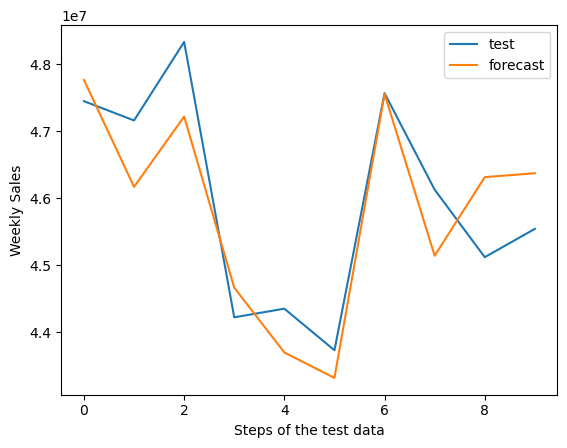

0.7343408625962049

In [39]:
# Listing 8-3 Fitting a SARIMAX model

import random
random.seed(12345)
import statsmodels.api as sm
from sklearn.metrics import r2_score
train = data['Weekly_Sales'][:-10]
test = data['Weekly_Sales'][-10:]
mod = sm.tsa.statespace.SARIMAX(endog=data['Weekly_Sales'][:-10],exog=data['IsHoliday'][:-10],order=(0,1,1),seasonal_order=(1,1,1,52),)
res = mod.fit(disp=False)
fcst = res.forecast(steps=10,exog = data['IsHoliday'][-10:])
plt.plot(list(test))
plt.plot(list(fcst))
plt.xlabel('Steps of the test data')
plt.ylabel('Weekly Sales')
plt.legend(['test', 'forecast'])
plt.show()
r2_score(test, fcst)


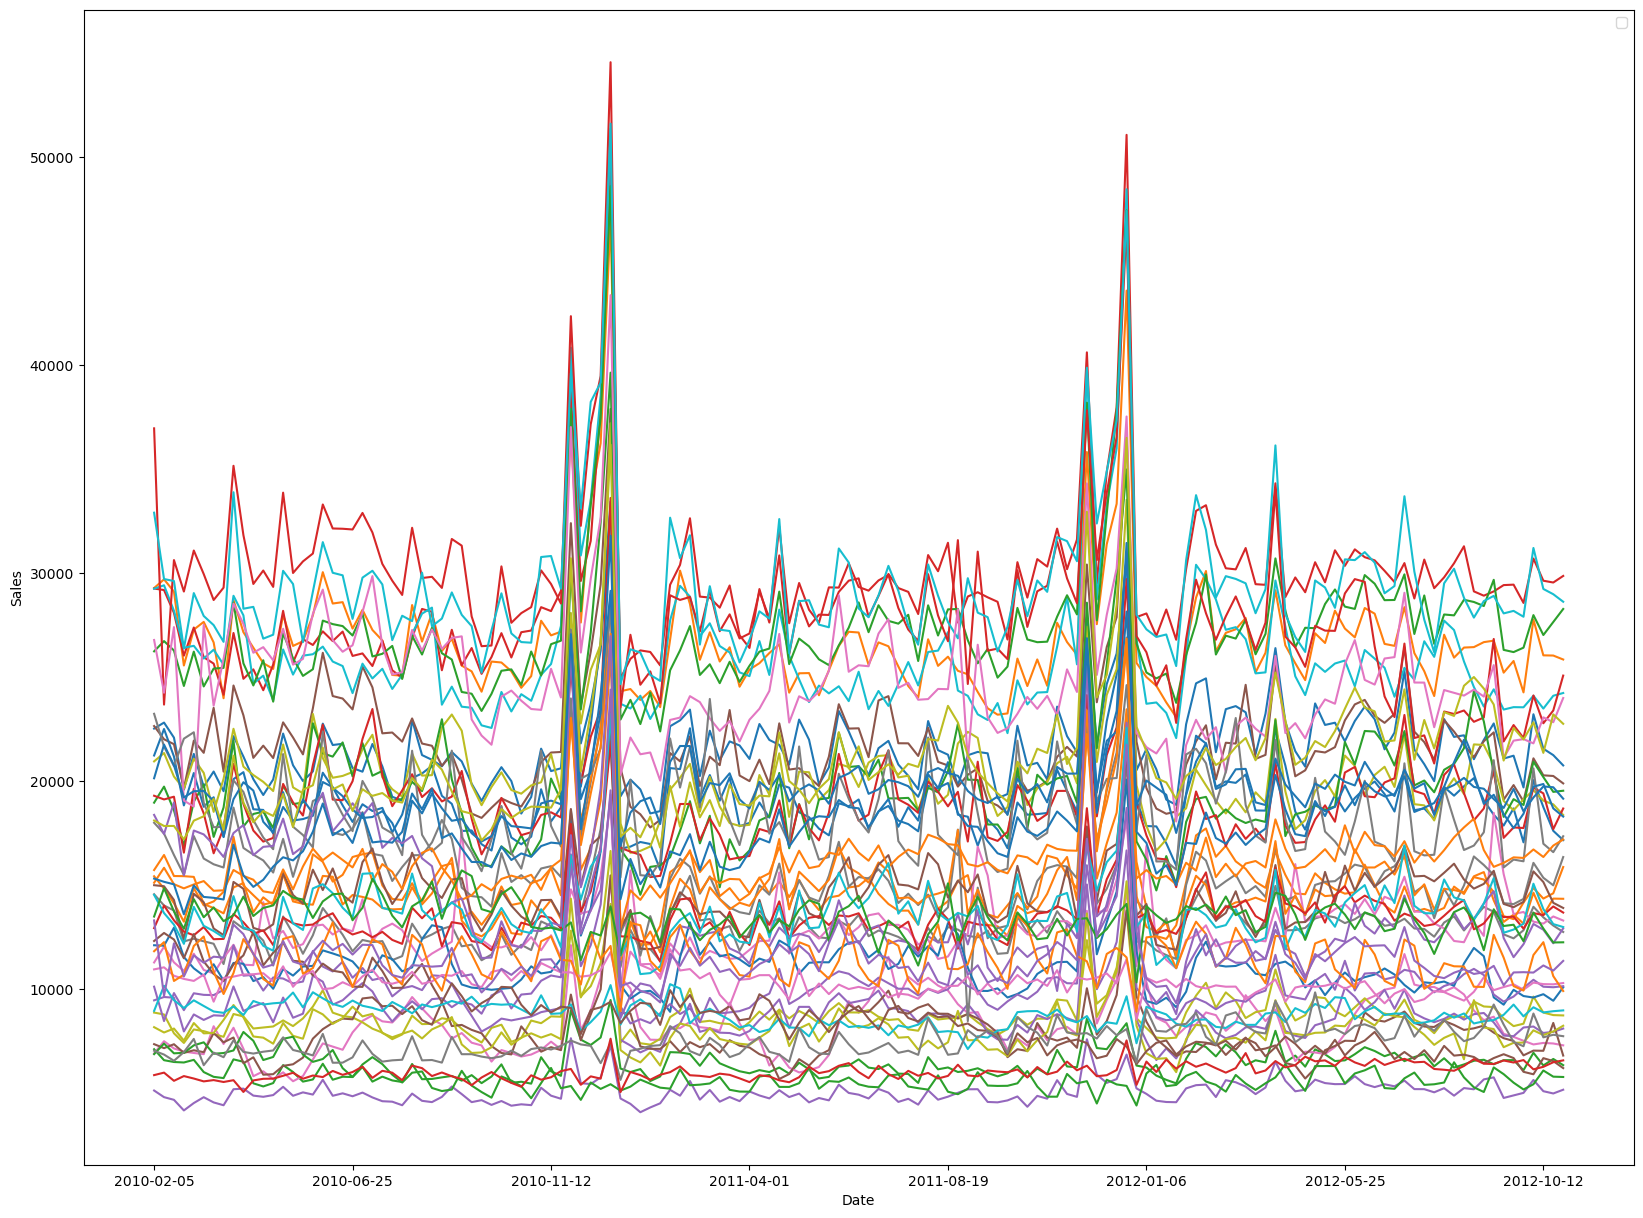

In [40]:
# Listing 9-1 Preparing the Walmart data per store”

import pandas as pd
import matplotlib.pyplot as plt
# data = pd.read_csv('walmart/train.csv')
data = pd.read_csv('~/Downloads/walmart-recruiting-store-sales-forecasting/train.csv')

data = data.pivot_table(index = 'Date', columns = 'Store', values = 'Weekly_Sales')
ax = data.plot(figsize=(20,15))
ax.legend([])
ax.set_ylabel('Sales')
plt.show()


In [41]:
# Listing 9-2 Fitting the VAR model”

from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.api import VAR
train = data.iloc[:-10,:]
test = data.iloc[-10:,:]
model = VAR(train)
results = model.fit(maxlags=2)
lag_order = results.k_ar
fcst = results.forecast(train.values[-lag_order:], 10)
model_accuracy = 1 - mean_absolute_percentage_error(test, fcst)
print(model_accuracy)

# “The model accuracy obtained with the model is 0.89.”



0.8911349592624245


/Users/peerapoly/anaconda3/envs/tfmac_env/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)



“Secondly, note that rather than doing a grid search, the example shows the use of an argument called maxlags. This means that the VAR model will optimize the choice for the order of the model itself, all while respecting a maximum lag. In this case, the maxlags has been chosen at two, as going above two would require more coefficients to be estimated than possible using the current data.”

Excerpt From
Advanced Forecasting with Python
Joos Korstanje
This material may be protected by copyright.